In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
mining=pd.read_csv('/content/cleaned_mining_data.csv')

In [3]:
mining.head()
mining.info()
mining.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194977 entries, 0 to 194976
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    194977 non-null  int64  
 1   objectid      194977 non-null  int64  
 2   id            194977 non-null  object 
 3   numero        194977 non-null  int64  
 4   ano           194977 non-null  int64  
 5   area_km2      194977 non-null  float64
 6   fase          194977 non-null  object 
 7   ult_evento    194977 non-null  object 
 8   nome          194977 non-null  object 
 9   subs          194977 non-null  object 
 10  uso           194977 non-null  object 
 11  uf            194977 non-null  object 
 12  status        194977 non-null  object 
 13  globalid      194977 non-null  object 
 14  shape_Length  194977 non-null  float64
 15  shape_Area    194977 non-null  float64
dtypes: float64(3), int64(4), object(9)
memory usage: 23.8+ MB


Unnamed: 0      0
objectid        0
id              0
numero          0
ano             0
area_km2        0
fase            0
ult_evento      0
nome            0
subs            0
uso             0
uf              0
status          0
globalid        0
shape_Length    0
shape_Area      0
dtype: int64

In [4]:
mining.loc[:,mining.all()] #no zeroes
mining.loc[:,mining.any()]
mining.loc[:,mining.isnull().any()] #lists 0 columns
mining.loc[:,mining.notnull().all()] # lists all rows & columns -- so I thought NaNs in data.. but there are NaN (DADO NÃO CADASTRADO, NÃO INFORMADO) in Spanish or Portugese

,Unnamed: 0,objectid,id,numero,ano,area_km2,fase,ult_evento,nome,subs,uso,uf,status,globalid,shape_Length,shape_Area
0,0,203664,{091DBD66-885B-4F55-B476-A79C26B28246},880147,1979,98.0000,AUTORIZAÇÃO DE PESQUISA,290 - AUT PESQ/RELATORIO PESQ FINAL APRESENTAD...,MINERAÇÃO IGUAPO LTDA,WOLFRAMITA,NÃO INFORMADO,AC,Exploration,{3D22252D-8F73-4596-A873-28DDF32A2B4D},40944.915251,1.003029e+08
1,1,203665,{3AE579FD-F0B7-4CA1-A18B-77E3F9C942B6},880954,1985,0.5000,CONCESSÃO DE LAVRA,440 - CONC LAV/ROTULO ÁGUA MINERAL APROVADO PU...,Verona Mineração Indústria e Comércio Ltda,ÁGUA MINERAL,NÃO INFORMADO,AC,Exploitation,{C536EEAC-DBC8-4400-9215-711BA3AB4829},3053.873800,5.192398e+05
2,2,203666,{BE2987A8-9D73-4D89-BF84-F4A1796CA491},880468,1987,100.0000,REQUERIMENTO DE PESQUISA,619 - REQ PESQ/PROCESSO SITUADO EM ÁREA INDÍGE...,EXPLORER MINERAÇÃO LTDA,PRATA,NÃO INFORMADO,AC,In application,{2A1BDF1F-9E85-4249-83A7-FA6AA7F64BF9},40467.951019,1.023523e+08
3,3,203667,{720585BA-00BA-4261-A81D-224733E91402},880469,1987,100.0000,REQUERIMENTO DE PESQUISA,619 - REQ PESQ/PROCESSO SITUADO EM ÁREA INDÍGE...,EXPLORER MINERAÇÃO LTDA,PRATA,NÃO INFORMADO,AM,In application,{6F3D16D0-CBE8-4698-888F-E6E1894F9ECE},40467.951709,1.023523e+08
4,4,203668,{734009C7-11D1-4D7F-9BB3-551A280D136E},880002,1992,0.5000,CONCESSÃO DE LAVRA,473 - CONC LAV/CUMPRIMENTO EXIGÊNCIA PROTOCOLI...,EMPRESA DE ÁGUA MINERAL MONTE MÁRIO LTDA,ÁGUA MINERAL,NÃO INFORMADO,AC,Exploitation,{54E93E61-A6FC-42E0-8115-687319922E68},3059.315900,5.188346e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194972,203655,407319,{C89A7B30-EEBA-4938-83EF-CEA1A2ED76F9},864497,2011,86.4774,DISPONIBILIDADE,1341 - AUT PESQ/ÁREA DISPONIBILIDADE PARA PESQ...,Oclam Minerações Ltda,MINÉRIO DE OURO,INDUSTRIAL,TO,Available,{76B2954E-16DF-48C8-9E50-CA2D75B35761},51970.387009,8.983568e+07
194973,203658,407322,{5F9DF511-722A-40F9-B69D-A3B2BC9C29DE},864006,2009,9.6156,DISPONIBILIDADE,1341 - AUT PESQ/ÁREA DISPONIBILIDADE PARA PESQ...,Água Limpa Energia S.a.,MINÉRIO DE OURO,INDUSTRIAL,TO,Available,{7195AA74-D3F8-4FAD-8B7C-9BF925A15744},26790.158745,1.008850e+07
194974,203659,407323,{8ECB5701-8D67-4336-83D5-BDD35D13C1D1},864309,2011,45.2505,DISPONIBILIDADE,1341 - AUT PESQ/ÁREA DISPONIBILIDADE PARA PESQ...,Rita de Cássia Pereira Guimarães Salgado Rabelo,MINÉRIO DE FERRO,INDUSTRIAL,TO,Available,{0DA7B7D9-01FD-4ED3-BCC3-D2375FD41BB0},27135.196400,4.601596e+07
194975,203660,407324,{1F23396F-6457-4C0D-B861-A92069E32027},864086,2015,0.0775,DISPONIBILIDADE,1342 - REQ LICEN/ÁREA DISPONIBILIDADE PARA PES...,Ceramica Guarany Ltda,ARGILA,CERÂMICA VERMELHA,TO,Available,{2500E66E-7C6C-41D3-9B90-A5355974FAFA},1438.314600,7.988791e+04


In [5]:
#Number of unique values in each column in mining data
mining.nunique(axis=0)

Unnamed: 0      194977
objectid        194977
id              194977
numero           45511
ano                 81
area_km2         71496
fase                12
ult_evento       47077
nome             43905
subs               340
uso                 25
uf                  27
status               5
globalid        194977
shape_Length    192455
shape_Area      192621
dtype: int64

The unique value of 'subs' column is 340 which means that there are 340 types of mierals which has been mined.

In [6]:
print('Number of states in mining data:',len(mining['uf'].unique().tolist()))
#To print the name of states in mining data
mining_state_name=mining['uf'].unique()
print('State names in mining data: ',sorted(mining_state_name))
print(mining['ano'].min()), print(mining['ano'].max())
print(sorted(mining['ano'].unique()))

Number of states in mining data: 27
State names in mining data:  ['AC', 'AL', 'AM', 'AP', 'BA', 'CE', 'DF', 'ES', 'GO', 'MA', 'MG', 'MS', 'MT', 'PA', 'PB', 'PE', 'PI', 'PR', 'RJ', 'RN', 'RO', 'RR', 'RS', 'SC', 'SE', 'SP', 'TO']
1935
2015
[1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015]


In [7]:
#Function to get the name of a mineral and to plot how much have been mined over years
def mineral_year_area_km2(df,mineral_name,sty_var,strt_yr=0,end_yr=0):
  print('Name of the mineral:',mineral_name)
  indices = df['subs'] == mineral_name
  #print('Number of data entries:',df[indices].count())
  new_df=df.loc[indices,:]
  #print(new_df['ano'], new_df['area_km2'])
  if strt_yr==0 and end_yr==0:
    strt_yr, end_yr = df['ano'].min(), df['ano'].max()
  print('X-axis limit: ',strt_yr, end_yr)
  new_df.plot(x='ano',y='area_km2',color='r',style=sty_var,xlabel='Year',ylabel='Area_km^2',title=mineral_name,rot=60)
  plt.xlim(strt_yr,end_yr)
  plt.show()

Name of the mineral: AREIA
X-axis limit:  2001 2005


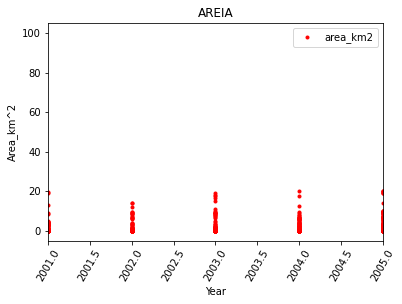

In [8]:
mineral_year_area_km2(mining,'AREIA',sty_var='.',strt_yr=2001,end_yr=2005)

In [9]:
#To groupby using the unique elements in column 'subs' i.e., 
#to calculate the number of entries for each minerals mined
minerals_mined_entries=mining.groupby('subs').count()
#print(minerals_mined_entries)
#To sort the calculated number of entries of mined minerals in desending order
minerals_mined_number_descending_order=minerals_mined_entries['ano'].sort_values(ascending=False)
print(minerals_mined_number_descending_order)
#print(minerals_mined_number_descending_order.iloc[0:50]) # 38222 - 332 entries
#print(minerals_mined_number_descending_order.iloc[0:90]) # 38222 - 93 entries

subs
AREIA                 38222
MINÉRIO DE OURO       21008
GRANITO               18144
ARGILA                15180
MINÉRIO DE FERRO      12147
                      ...  
DIORITO INDUSTRIAL        1
DIORITO P/ BRITA          1
TUFO VULCÂNICO            1
CALCÁRIO P/ BRITA         1
QUARTZO RÓSEO             1
Name: ano, Length: 340, dtype: int64


In [10]:
#To groupby using the unique elements in column 'subs' and sum the area (in total) deforesated fot that mineral i.e., 
#to calculate the total area for each minerals mined
minerals_mined_area=mining.groupby('subs')['area_km2'].sum()
#To sort the calculated total areas of mined minerals in desending order
minerals_mined_area_descending_order=minerals_mined_area.sort_values(ascending=False)
print(minerals_mined_area_descending_order)
print(minerals_mined_area_descending_order.iloc[0:10])

subs
MINÉRIO DE OURO                  423712.7791
MINÉRIO DE FERRO                 240031.8772
OURO                             201540.3398
MINÉRIO DE COBRE                 132209.9754
FOSFATO                          108681.5440
                                    ...     
CAULIM ARGILOSO                       0.1500
OLIVINA                               0.1052
ÁGUA MINERAL ALC. TER. CALCI.         0.0507
AREIA FINA                            0.0500
QUARTZITO FRIÁVEL                     0.0461
Name: area_km2, Length: 340, dtype: float64
subs
MINÉRIO DE OURO        423712.7791
MINÉRIO DE FERRO       240031.8772
OURO                   201540.3398
MINÉRIO DE COBRE       132209.9754
FOSFATO                108681.5440
GRANITO                 86745.9016
BAUXITA                 84963.0526
MINÉRIO DE MANGANÊS     65009.0055
AREIA                   56875.1306
CASSITERITA             50507.1655
Name: area_km2, dtype: float64


In [11]:
#Deforestation data
deforest=pd.read_csv('/content/PRODES_Deforestation_in_Amazonia.csv')

#To remove rows with area=0. in deforest data
print('Min. and max. of area in deforest data: ',deforest['AREA_KM'].min(),deforest['AREA_KM'].max())
deforest_clean=deforest.drop(deforest[(deforest['AREA_KM']==0.)].index)
print('Min. and max. of area in deforest_clean data: ',deforest_clean['AREA_KM'].min(),deforest_clean['AREA_KM'].max())
print('Years in deforest_clean data: ',deforest_clean['YEAR'].min(),deforest_clean['YEAR'].max())

print('Number of states in deforestation data:',len(deforest_clean['STATE'].unique().tolist()))
#To print the name of states in deforestation data
deforest_state_name=deforest_clean['STATE'].unique()
print('State names in deforestation data: ',sorted(deforest_state_name))

Min. and max. of area in deforest data:  0.0 53.7719597814818
Min. and max. of area in deforest_clean data:  1.35525271560688e-25 53.7719597814818
Years in deforest_clean data:  2008 2019
Number of states in deforestation data: 9
State names in deforestation data:  ['AC', 'AM', 'AP', 'MA', 'MT', 'PA', 'RO', 'RR', 'TO']


In [12]:
print('Years in mining data: ',sorted(mining['ano'].unique()))
print('Years in deforestation data',sorted(deforest_clean['YEAR'].unique()))

Years in mining data:  [1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015]
Years in deforestation data [2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]


In [13]:
mining_bkp=mining
#mining=mining_bkp

In [18]:
#To create a combined data of mining and deforestation data for the common years and common states (9 states).
print('States in mining data before: ',mining['uf'].unique())
mining=mining.loc[(mining['uf']=='AC') | (mining['uf']=='AM') | (mining['uf']=='AP') | (mining['uf']=='MA') | (mining['uf']=='MT') | (mining['uf']=='PA') | (mining['uf']=='RO') | (mining['uf']=='RR') | (mining['uf']=='TO')]
print('Years in mining data before: ',mining['ano'].min(),mining['ano'].max()) #mining data belonging to corresponding 9 states are available only till 2015

print('States in mining data after: ',mining['uf'].unique())
mining=mining.loc[(mining['ano']>=2008) & (mining['ano']<=2019)]
print('Years in mining data after: ',mining['ano'].unique())
mining.shape
#print(np.sort(mining['ano'].unique()))
#print(np.sort(mining['uf'].unique()))


States in mining data before:  ['RO' 'AC' 'AM' 'PA' 'AP' 'TO' 'MT' 'MA' 'RR']
Years in mining data before:  2008 2015
States in mining data after:  ['RO' 'AC' 'AM' 'PA' 'AP' 'TO' 'MT' 'MA' 'RR']
Years in mining data after:  [2008 2009 2010 2011 2012 2013 2014 2015]


(23356, 16)

In [15]:
#Brazil - 9 states
#To groupby using the unique elements in column 'subs' and sum the area (in total) deforesated fot that mineral i.e., 
#to calculate the total area for each minerals mined
minerals_mined_area=mining.groupby('subs')['area_km2'].sum()
#To sort the calculated total areas of mined minerals in desending order
minerals_mined_area_descending_order=minerals_mined_area.sort_values(ascending=False)
print('No. of minerals: ',len(minerals_mined_area_descending_order))
print(minerals_mined_area_descending_order)
print(minerals_mined_area_descending_order.iloc[0:30])

No. of minerals:  94
subs
MINÉRIO DE OURO         227972.5543
MINÉRIO DE FERRO         88114.2050
MINÉRIO DE COBRE         54538.8855
FOSFATO                  45902.8293
BAUXITA                  45852.7299
                           ...     
ÁGUA POTÁVEL DE MESA         1.0046
SILTITO                      1.0020
GABRO                        0.8692
CONGLOMERADO                 0.6704
CITRINO                      0.4893
Name: area_km2, Length: 94, dtype: float64
subs
MINÉRIO DE OURO         227972.5543
MINÉRIO DE FERRO         88114.2050
MINÉRIO DE COBRE         54538.8855
FOSFATO                  45902.8293
BAUXITA                  45852.7299
SAIS DE POTÁSSIO         42708.6038
CASSITERITA              32272.9087
MINÉRIO DE MANGANÊS      20646.7546
DIAMANTE                 18776.5785
MINÉRIO DE ESTANHO        9676.1044
MINÉRIO DE NÍQUEL         9043.5011
ILMENITA                  6559.9394
MINÉRIO DE TÂNTALO        6394.4603
MINÉRIO DE ALUMÍNIO       6350.1094
AREIA                     

In [19]:
years=np.sort(mining['ano'].unique())
print(years)

x=30
x=94 #all minerals
#Taking only top x minerals which has highest number of area deforested in Brazil
mado_minx=minerals_mined_area_descending_order.iloc[0:x]
mineral_names_x=mado_minx.index
mineral_names_x.shape

#To calculate the max. of area for a mineral in each year
jy, ix = len(years),len(mado_minx)
print(jy, ix)
print(type(ix))
md_max_area_yr=np.empty((jy, ix)) # creating a empty matrix 
md_max_area_yr[:]=0#I think 0 is better than np.nan #
print(md_max_area_yr)

for j in range(0,jy):
  for i in range(0,ix):
    chk_year=years[j]
    chk_mineral=mineral_names_x[i]
    temp=mining.loc[(mining['ano']==chk_year) & (mining['subs']==chk_mineral)]['area_km2'].max()
    #print(j,i,chk_year,chk_mineral,temp)
    md_max_area_yr[j,i]=temp

print(md_max_area_yr)

[2008 2009 2010 2011 2012 2013 2014 2015]
8 94
<class 'int'>
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0

In [20]:
#Convert numpy array to a dataframe
df_max=pd.DataFrame(md_max_area_yr,index=years,columns=mineral_names_x)
df_max.head(10)
#print(df_max.shape)

subs,MINÉRIO DE OURO,MINÉRIO DE FERRO,MINÉRIO DE COBRE,FOSFATO,BAUXITA,SAIS DE POTÁSSIO,CASSITERITA,MINÉRIO DE MANGANÊS,DIAMANTE,MINÉRIO DE ESTANHO,MINÉRIO DE NÍQUEL,ILMENITA,MINÉRIO DE TÂNTALO,MINÉRIO DE ALUMÍNIO,AREIA,CALCÁRIO,MINÉRIO DE CHUMBO,ARGILA,OURO,ROCHA PIROBETUMINOSA,CAULIM,MINÉRIO DE NIÓBIO,MINÉRIO DE ZINCO,MINÉRIO DE TITÂNIO,GRANITO,NÍQUEL,FERRO,OPALA,SALGEMA,TERRAS RARAS,TURFA,MINÉRIO DE TUNGSTÊNIO,DIAMANTE INDUSTRIAL,CASCALHO,GIPSITA,MINÉRIO DE ZIRCÔNIO,APATITA,QUARTZO,BASALTO,CALCÁRIO DOLOMÍTICO,...,FELDSPATO,GNAISSE,QUARTZITO,ESTANHO,MINÉRIO DE PLATINA,HEMATITA,TURMALINA,MINÉRIO DE PALÁDIO,ROCHA BETUMINOSA,ARENITO,MAGNETITA,SAIBRO,CONCHAS CALCÁRIAS,GRANADA,DOLOMITO,LATERITA,ESMERALDA,MORGANITA,MONAZITA,GRAFITA,GRANITO ORNAMENTAL,DIATOMITO,MINÉRIO DE VANÁDIO,AMETISTA,ARDÓSIA,MINÉRIO DE LÍTIO,CIANITA,MINÉRIO DE CROMO,BERILO,CARVÃO MINERAL,CÁDMIO,NEFELINA,TOPÁZIO,COLUMBITA,ARGILITO,ÁGUA POTÁVEL DE MESA,SILTITO,GABRO,CONGLOMERADO,CITRINO
2008,100.0013,100.0000,100.0000,100.0000,100.0000,100.0000,99.9985,100.0000,99.9627,100.0000,99.4201,99.1931,50.4308,99.7394,8.7868,10.0000,93.9796,10.0005,94.9358,NaN,86.0250,5.8758,100.0000,89.7023,9.9991,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.5000,2.4877,0.6569,NaN,9.9989,3.6328,0.4900,...,NaN,0.5000,0.5000,NaN,NaN,NaN,NaN,16.9323,NaN,0.0100,NaN,0.4900,NaN,NaN,NaN,0.4959,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.7718,NaN,NaN,NaN,NaN,0.5000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009,100.0000,99.9774,99.9815,99.9267,99.9988,99.5490,99.9965,99.9561,78.0194,93.7496,99.6581,99.5734,82.9363,59.7559,30.9230,10.0000,95.1622,9.9365,100.0000,NaN,49.6343,NaN,38.3760,98.2326,4.9420,52.5112,NaN,NaN,NaN,NaN,19.9681,48.3401,NaN,1.6013,10.0000,NaN,NaN,1.0098,0.4993,0.5000,...,NaN,0.4617,NaN,NaN,NaN,60.9611,NaN,NaN,NaN,0.4948,NaN,0.2587,NaN,NaN,8.5839,0.2109,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010,100.0004,99.9988,99.9266,99.9593,100.0001,99.9983,100.0001,99.9990,99.9965,99.9789,99.9871,99.9852,97.1405,99.9999,76.9951,10.0000,87.0065,9.9996,99.9778,NaN,67.7188,91.3672,4.6506,98.9964,9.4625,58.2797,NaN,NaN,NaN,95.0474,15.6313,39.2987,NaN,0.5000,9.9809,NaN,NaN,9.3329,9.8830,NaN,...,NaN,0.5000,0.5000,NaN,NaN,NaN,NaN,NaN,NaN,0.5000,NaN,0.5000,9.9666,NaN,0.1720,0.4983,7.7173,NaN,2.7661,NaN,NaN,NaN,NaN,0.5000,NaN,7.8456,NaN,NaN,NaN,NaN,5.2896,NaN,NaN,NaN,NaN,0.3495,NaN,0.4956,0.1704,NaN
2011,100.0005,100.0002,100.0003,99.9749,100.0002,99.9999,100.0001,99.9792,99.9963,99.8816,99.6170,99.7692,99.9936,77.0194,99.0385,9.9998,89.6385,29.4678,99.7870,NaN,84.1794,99.8519,2.1472,99.6810,9.9980,99.8048,100.0001,NaN,NaN,98.8622,NaN,NaN,95.3495,19.4014,9.9912,98.6294,NaN,3.9195,9.9403,9.9979,...,NaN,0.4998,NaN,NaN,63.721,NaN,8.5252,NaN,NaN,0.4909,NaN,0.4969,NaN,0.4899,NaN,0.4827,NaN,NaN,10.5236,NaN,9.9999,NaN,NaN,NaN,NaN,NaN,6.1778,3.6053,0.5000,2.4839,NaN,NaN,NaN,NaN,NaN,0.4796,NaN,0.2024,NaN,NaN
2012,100.0001,99.9972,99.8569,99.9999,100.0001,99.8875,99.9998,99.7885,99.9999,99.8273,100.0001,99.4656,99.8620,97.3518,99.3384,10.0000,99.9930,10.0000,95.5924,NaN,97.7832,83.1132,26.7290,NaN,10.0000,99.9215,NaN,0.4937,99.9983,7.8788,44.8305,NaN,NaN,87.9395,10.0000,NaN,NaN,9.9999,9.6148,0.4860,...,92.3396,5.2268,0.5000,60.8115,NaN,NaN,34.6726,30.2533,NaN,1.8046,39.228,0.5000,NaN,6.3388,NaN,0.4987,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.4990,7.8549,NaN,NaN,NaN,0.5000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013,100.0000,99.9747,100.0000,100.0000,99.9248,99.3825,99.9680,99.8404,100.0000,100.0000,99.9999,97.7842,100.0000,99.8556,78.8107,39.6792,4.1561,9.9998,93.9555,NaN,99.9753,99.0404,90.1333,39.8648,10.0000,NaN,NaN,NaN,99.9028,NaN,19.9971,98.7846,NaN,18.9166,10.0000,22.9724,99.2844,9.9899,9.9691,3.0105,...,NaN,4.8435,9.9999,7.0479,NaN,NaN,NaN,NaN,NaN,4.0696,NaN,0.5000,NaN,NaN,NaN,0.4959,NaN,NaN,NaN,0.5388,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.3898,NaN,NaN,NaN,0.4964,0.4989,2.4616,NaN,1.002,NaN,NaN,NaN
2014,100.0000,99.9991,99.9969,99.9997,100.0003,99.8874,99.9878,99.9801,99.9

In [22]:
#To sum the deforestation area in a year
df2=np.empty(jy) # creating a empty array
df2[:]=0#I think 0 is better than np.nan #

for j in range(0,jy):
    chk_year=years[j]
    temp=deforest_clean.loc[deforest_clean['YEAR']==chk_year]['AREA_KM'].sum()
    df2[j] = temp   

print(df2)

[13318.88121116  6313.02580646  6298.10261412  5695.58607542
  4430.78477433  5400.21047685  5115.42964594  6117.82385106]


In [23]:
df_max['deforest_area_km']=df2 #to include deforest area from deforest data to df dataframe
print(df_max.shape)
df_max.head(10)

(8, 95)


subs,MINÉRIO DE OURO,MINÉRIO DE FERRO,MINÉRIO DE COBRE,FOSFATO,BAUXITA,SAIS DE POTÁSSIO,CASSITERITA,MINÉRIO DE MANGANÊS,DIAMANTE,MINÉRIO DE ESTANHO,MINÉRIO DE NÍQUEL,ILMENITA,MINÉRIO DE TÂNTALO,MINÉRIO DE ALUMÍNIO,AREIA,CALCÁRIO,MINÉRIO DE CHUMBO,ARGILA,OURO,ROCHA PIROBETUMINOSA,CAULIM,MINÉRIO DE NIÓBIO,MINÉRIO DE ZINCO,MINÉRIO DE TITÂNIO,GRANITO,NÍQUEL,FERRO,OPALA,SALGEMA,TERRAS RARAS,TURFA,MINÉRIO DE TUNGSTÊNIO,DIAMANTE INDUSTRIAL,CASCALHO,GIPSITA,MINÉRIO DE ZIRCÔNIO,APATITA,QUARTZO,BASALTO,CALCÁRIO DOLOMÍTICO,...,GNAISSE,QUARTZITO,ESTANHO,MINÉRIO DE PLATINA,HEMATITA,TURMALINA,MINÉRIO DE PALÁDIO,ROCHA BETUMINOSA,ARENITO,MAGNETITA,SAIBRO,CONCHAS CALCÁRIAS,GRANADA,DOLOMITO,LATERITA,ESMERALDA,MORGANITA,MONAZITA,GRAFITA,GRANITO ORNAMENTAL,DIATOMITO,MINÉRIO DE VANÁDIO,AMETISTA,ARDÓSIA,MINÉRIO DE LÍTIO,CIANITA,MINÉRIO DE CROMO,BERILO,CARVÃO MINERAL,CÁDMIO,NEFELINA,TOPÁZIO,COLUMBITA,ARGILITO,ÁGUA POTÁVEL DE MESA,SILTITO,GABRO,CONGLOMERADO,CITRINO,deforest_area_km
2008,100.0013,100.0000,100.0000,100.0000,100.0000,100.0000,99.9985,100.0000,99.9627,100.0000,99.4201,99.1931,50.4308,99.7394,8.7868,10.0000,93.9796,10.0005,94.9358,NaN,86.0250,5.8758,100.0000,89.7023,9.9991,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.5000,2.4877,0.6569,NaN,9.9989,3.6328,0.4900,...,0.5000,0.5000,NaN,NaN,NaN,NaN,16.9323,NaN,0.0100,NaN,0.4900,NaN,NaN,NaN,0.4959,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.7718,NaN,NaN,NaN,NaN,0.5000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13318.881211
2009,100.0000,99.9774,99.9815,99.9267,99.9988,99.5490,99.9965,99.9561,78.0194,93.7496,99.6581,99.5734,82.9363,59.7559,30.9230,10.0000,95.1622,9.9365,100.0000,NaN,49.6343,NaN,38.3760,98.2326,4.9420,52.5112,NaN,NaN,NaN,NaN,19.9681,48.3401,NaN,1.6013,10.0000,NaN,NaN,1.0098,0.4993,0.5000,...,0.4617,NaN,NaN,NaN,60.9611,NaN,NaN,NaN,0.4948,NaN,0.2587,NaN,NaN,8.5839,0.2109,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6313.025806
2010,100.0004,99.9988,99.9266,99.9593,100.0001,99.9983,100.0001,99.9990,99.9965,99.9789,99.9871,99.9852,97.1405,99.9999,76.9951,10.0000,87.0065,9.9996,99.9778,NaN,67.7188,91.3672,4.6506,98.9964,9.4625,58.2797,NaN,NaN,NaN,95.0474,15.6313,39.2987,NaN,0.5000,9.9809,NaN,NaN,9.3329,9.8830,NaN,...,0.5000,0.5000,NaN,NaN,NaN,NaN,NaN,NaN,0.5000,NaN,0.5000,9.9666,NaN,0.1720,0.4983,7.7173,NaN,2.7661,NaN,NaN,NaN,NaN,0.5000,NaN,7.8456,NaN,NaN,NaN,NaN,5.2896,NaN,NaN,NaN,NaN,0.3495,NaN,0.4956,0.1704,NaN,6298.102614
2011,100.0005,100.0002,100.0003,99.9749,100.0002,99.9999,100.0001,99.9792,99.9963,99.8816,99.6170,99.7692,99.9936,77.0194,99.0385,9.9998,89.6385,29.4678,99.7870,NaN,84.1794,99.8519,2.1472,99.6810,9.9980,99.8048,100.0001,NaN,NaN,98.8622,NaN,NaN,95.3495,19.4014,9.9912,98.6294,NaN,3.9195,9.9403,9.9979,...,0.4998,NaN,NaN,63.721,NaN,8.5252,NaN,NaN,0.4909,NaN,0.4969,NaN,0.4899,NaN,0.4827,NaN,NaN,10.5236,NaN,9.9999,NaN,NaN,NaN,NaN,NaN,6.1778,3.6053,0.5000,2.4839,NaN,NaN,NaN,NaN,NaN,0.4796,NaN,0.2024,NaN,NaN,5695.586075
2012,100.0001,99.9972,99.8569,99.9999,100.0001,99.8875,99.9998,99.7885,99.9999,99.8273,100.0001,99.4656,99.8620,97.3518,99.3384,10.0000,99.9930,10.0000,95.5924,NaN,97.7832,83.1132,26.7290,NaN,10.0000,99.9215,NaN,0.4937,99.9983,7.8788,44.8305,NaN,NaN,87.9395,10.0000,NaN,NaN,9.9999,9.6148,0.4860,...,5.2268,0.5000,60.8115,NaN,NaN,34.6726,30.2533,NaN,1.8046,39.228,0.5000,NaN,6.3388,NaN,0.4987,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.4990,7.8549,NaN,NaN,NaN,0.5000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4430.784774
2013,100.0000,99.9747,100.0000,100.0000,99.9248,99.3825,99.9680,99.8404,100.0000,100.0000,99.9999,97.7842,100.0000,99.8556,78.8107,39.6792,4.1561,9.9998,93.9555,NaN,99.9753,99.0404,90.1333,39.8648,10.0000,NaN,NaN,NaN,99.9028,NaN,19.9971,98.7846,NaN,18.9166,10.0000,22.9724,99.2844,9.9899,9.9691,3.0105,...,4.8435,9.9999,7.0479,NaN,NaN,NaN,NaN,NaN,4.0696,NaN,0.5000,NaN,NaN,NaN,0.4959,NaN,NaN,NaN,0.5388,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.3898,NaN,NaN,NaN,0.4964,0.4989,2.4616,NaN,1.002,NaN,NaN,NaN,5400.210477
2014,100.0000,99.9991,9

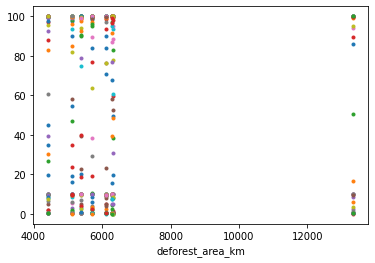

In [24]:
df_max.plot(x="deforest_area_km", y=df_max.columns.values[:-1], style='.', legend=False)

In [25]:
#Annual area from deforestation data - Max of annual area of mining area
chk9=np.nansum(md_max_area_yr,axis=1)
print(df2-chk9)
print('Percentage of deforestation due to mining: ',chk9/df2*100.)

[11411.93221116  4259.62820646  3962.30761412  2792.86387542
  1799.08767433  2714.36927685  2491.29364594  3941.22135106]
Percentage of deforestation due to mining:  [14.31763652 32.52636157 37.08728078 50.96441633 59.39573313 49.73586144
 51.29844767 35.57805117]


In [26]:
#To create a .csv file with percentage of deforestation due to mining
deforest_percnt=pd.DataFrame({'Years':years, 'deforestation_mining_percentage':chk9/df2*100.})
deforest_percnt.info()
deforest_percnt.head(20)
deforest_percnt.to_csv('/content/mining_%_deforestation.csv')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Years                            8 non-null      int64  
 1   deforestation_mining_percentage  8 non-null      float64
dtypes: float64(1), int64(1)
memory usage: 256.0 bytes


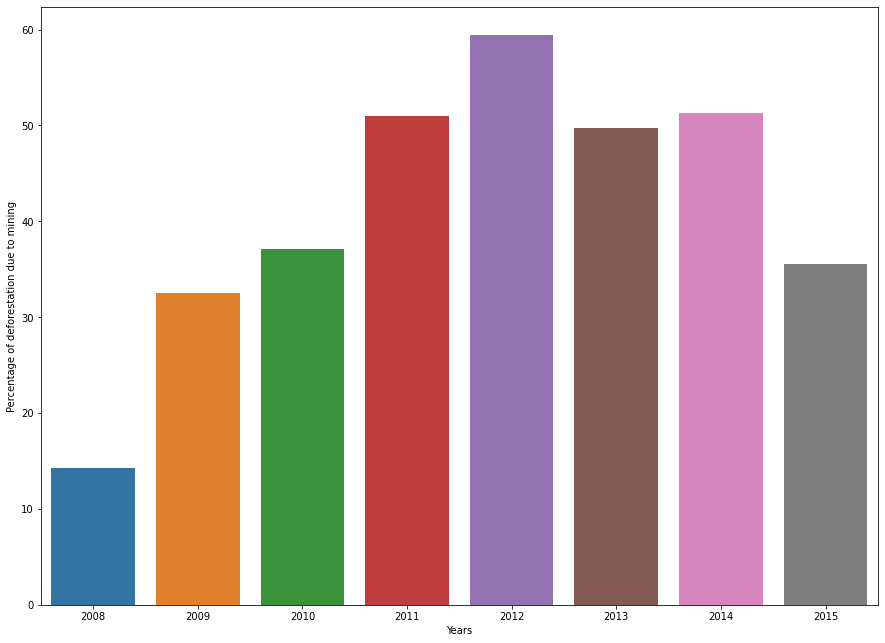

In [27]:
fig, ax = plt.subplots(figsize=(15,11))
sns.barplot(x="Years", y="deforestation_mining_percentage", ax=ax, data=deforest_percnt)
ax.set(xlabel='Years',ylabel='Percentage of deforestation due to mining')
plt.savefig('mining_%_deforestation.png')
plt.show()

<class 'numpy.ndarray'> <class 'numpy.ndarray'>


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 479.8980090378976, tolerance: 191.3414964493552
  positive)


lasso_coef:  [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  2.55270364e+01  0.00000000e+00  0.00000000e+00
  1.51435668e+01  1.71759801e+02  1.05090366e+01  1.75080006e+00
 -1.51869354e+02 -1.05735115e+01 -2.17629625e+00 -5.44653044e+00
 -3.46604211e+00  1.11897393e+01 -3.28511269e+01  1.16535102e+00
 -1.26508345e+00  1.49839897e+00  1.07839173e+00  8.12772557e+00
  1.26599720e+02 -3.04337397e+00 -4.08844239e-01 -6.41353594e-01
 -1.81896592e+00  2.10211864e+00  1.88166460e+00  1.25369656e+00
 -1.74453014e+00 -8.52144443e-01 -0.00000000e+00 -1.38209158e-01
 -7.97701698e-01  1.22297322e-01  1.53910989e+01 -4.03901335e+00
 -7.48777861e-01 -1.65070519e-01 -6.88652615e-01  1.12248880e+00
  1.76438486e-01  3.26170994e+00 -1.21713506e+00 -0.00000000e+00
 -0.00000000e+00 -5.92345664e-02  6.11473335e-01  8.85071547e-02
  0.00000000e+00  0.00000000e+00 -3.38494450e-01 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00  0.00000000e+00 -0.00000000e+00
 -0.00000000

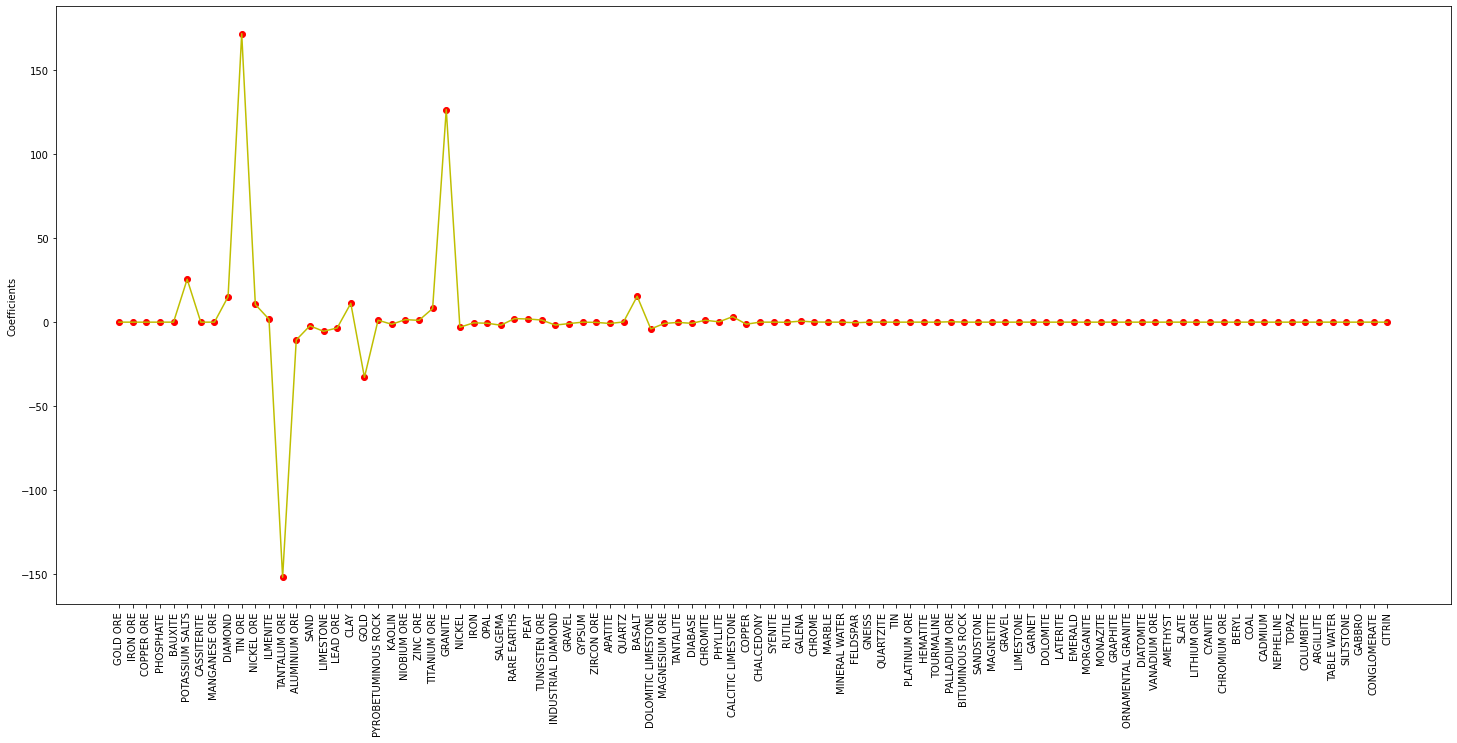

In [28]:
#lasso regression for feature selection

df_max2=df_max.fillna(0) # to fill all nan as 0

dataX=df_max2.drop('deforest_area_km',axis=1).values
#temp=dataX[:,0:30]
#dataX=temp
datay=df_max2['deforest_area_km'].values
print(type(dataX),type(dataX))

from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
X_train, X_test, y_train, y_test = train_test_split(dataX, datay, test_size=0.4, random_state=42)
lasso = Lasso(alpha=0.1, normalize=True)
lasso.fit(X_train, y_train)
lasso_pred = lasso.predict(X_test)
lasso.score(X_test, y_test)

#Lasso for feature selection in scikit-learn

df_max2.columns=['GOLD ORE','IRON ORE','COPPER ORE','PHOSPHATE','BAUXITE', 'POTASSIUM SALTS', 'CASSITERITE', 'MANGANESE ORE','DIAMOND','TIN ORE','NICKEL ORE', 'ILMENITE','TANTALUM ORE','ALUMINIUM ORE','SAND','LIMESTONE','LEAD ORE','CLAY','GOLD','PYROBETUMINOUS ROCK','KAOLIN','NIOBIUM ORE','ZINC ORE','TITANIUM ORE','GRANITE','NICKEL','IRON','OPAL','SALGEMA','RARE EARTHS','PEAT','TUNGSTEN ORE','INDUSTRIAL DIAMOND','GRAVEL','GYPSUM','ZIRCON ORE','APATITE','QUARTZ','BASALT','DOLOMITIC LIMESTONE','MAGNESIUM ORE','TANTALITE','DIABASE','CHROMITE','PHYLLITE','CALCITIC LIMESTONE','COPPER','CHALCEDONY','SYENITE','RUTILE','GALENA','CHROME','MARBLE','MINERAL WATER','FELDSPAR','GNEISS','QUARTZITE','TIN','PLATINUM ORE','HEMATITE','TOURMALINE','PALLADIUM ORE','BITUMINOUS ROCK','SANDSTONE','MAGNETITE','GRAVEL','LIMESTONE','GARNET','DOLOMITE','LATERITE','EMERALD','MORGANITE','MONAZITE','GRAPHITE','ORNAMENTAL GRANITE','DIATOMITE','VANADIUM ORE','AMETHYST','SLATE','LITHIUM ORE','CYANITE','CHROMIUM ORE','BERYL','COAL','CADMIUM','NEPHELINE','TOPAZ','COLUMBITE','ARGILLITE','TABLE WATER','SILTSTONE','GABBRO','CONGLOMERATE','CITRIN','deforest_area_km']
names = df_max2.drop('deforest_area_km',axis=1).columns
lasso = Lasso(alpha=0.1)
lasso_coef = lasso.fit(dataX,datay).coef_
print('lasso_coef: ',lasso_coef)
print('Mineral names: ',mado_minx.index)
#Plot the coefficients
fig, ax = plt.subplots(figsize=(25,11))
plt.plot(range(len(names)), lasso_coef, 'ro')
plt.plot(range(len(names)), lasso_coef, 'y')
plt.xticks(range(len(names)), names, rotation=90)
plt.ylabel('Coefficients')
plt.savefig('lasso_mining.png')
plt.show()

In [29]:
#deforested area (max.of area not the sum) due to mining from 2008-2015 for top 10 minerals
#print(minerals_mined_area_descending_order.iloc[0:10].values) this is not correct.. as we are using only the max of area in a year

minerals_mined_area_descending_order.index[0:10].values
top_10_mineral_in_English=['GOLD ORE', 'IRON ORE', 'COPPER ORE', 'BAUXITE', 'POTASSIUM SALTS', 'PHOSPHATE', 'CASSITERITE', 'DIAMOND', 'MANGANESE ORE', 'TIN ORE']

chk7=np.nansum(md_max_area_yr,axis=0)
print(chk7[0:10])

deforest_mining_area=pd.DataFrame({'Minerals':top_10_mineral_in_English, 'deforested_area':chk7[0:10]})
deforest_mining_area.info()
deforest_mining_area.to_csv('/content/deforested_area_top10_minerals.csv')
deforest_mining_area.head(20)

[800.0023 799.9452 799.7411 798.6273 799.9206 775.196  799.8261 799.5287
 777.9399 786.9748]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Minerals         10 non-null     object 
 1   deforested_area  10 non-null     float64
dtypes: float64(1), object(1)
memory usage: 288.0+ bytes


,Minerals,deforested_area
0,GOLD ORE,800.0023
1,IRON ORE,799.9452
2,COPPER ORE,799.7411
3,BAUXITE,798.6273
4,POTASSIUM SALTS,799.9206
5,PHOSPHATE,775.1960
6,CASSITERITE,799.8261
7,DIAMOND,799.5287
8,MANGANESE ORE,777.9399
9,TIN ORE,786.9748


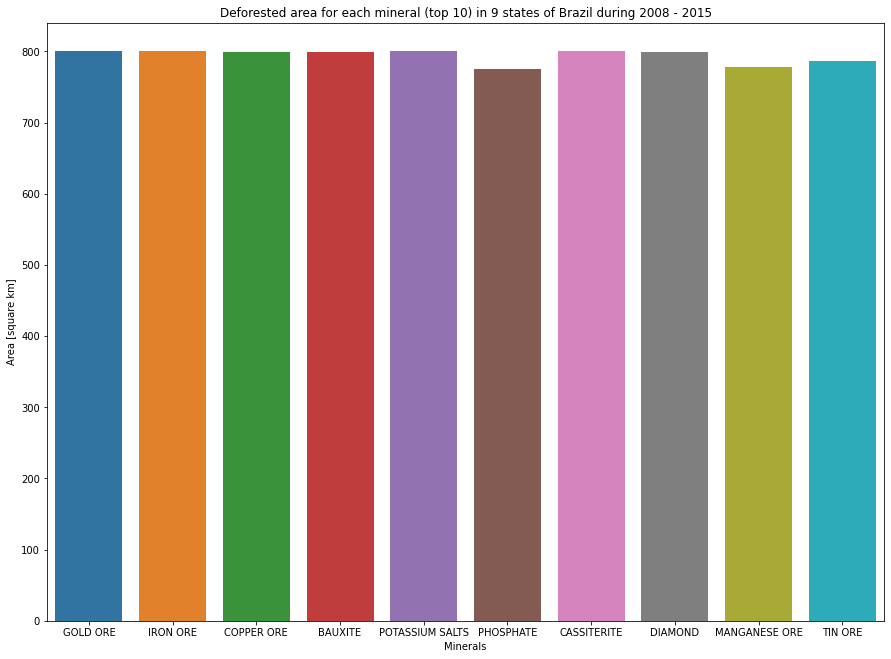

In [30]:
fig, ax = plt.subplots(figsize=(15,11))
sns.barplot(x="Minerals", y="deforested_area", ax=ax, data=deforest_mining_area)
ax.set(xlabel='Minerals',ylabel='Area [square km]',title='Deforested area for each mineral (top 10) in 9 states of Brazil during 2008 - 2015')
plt.savefig('deforested_area_top10_minerals.png')
plt.show()

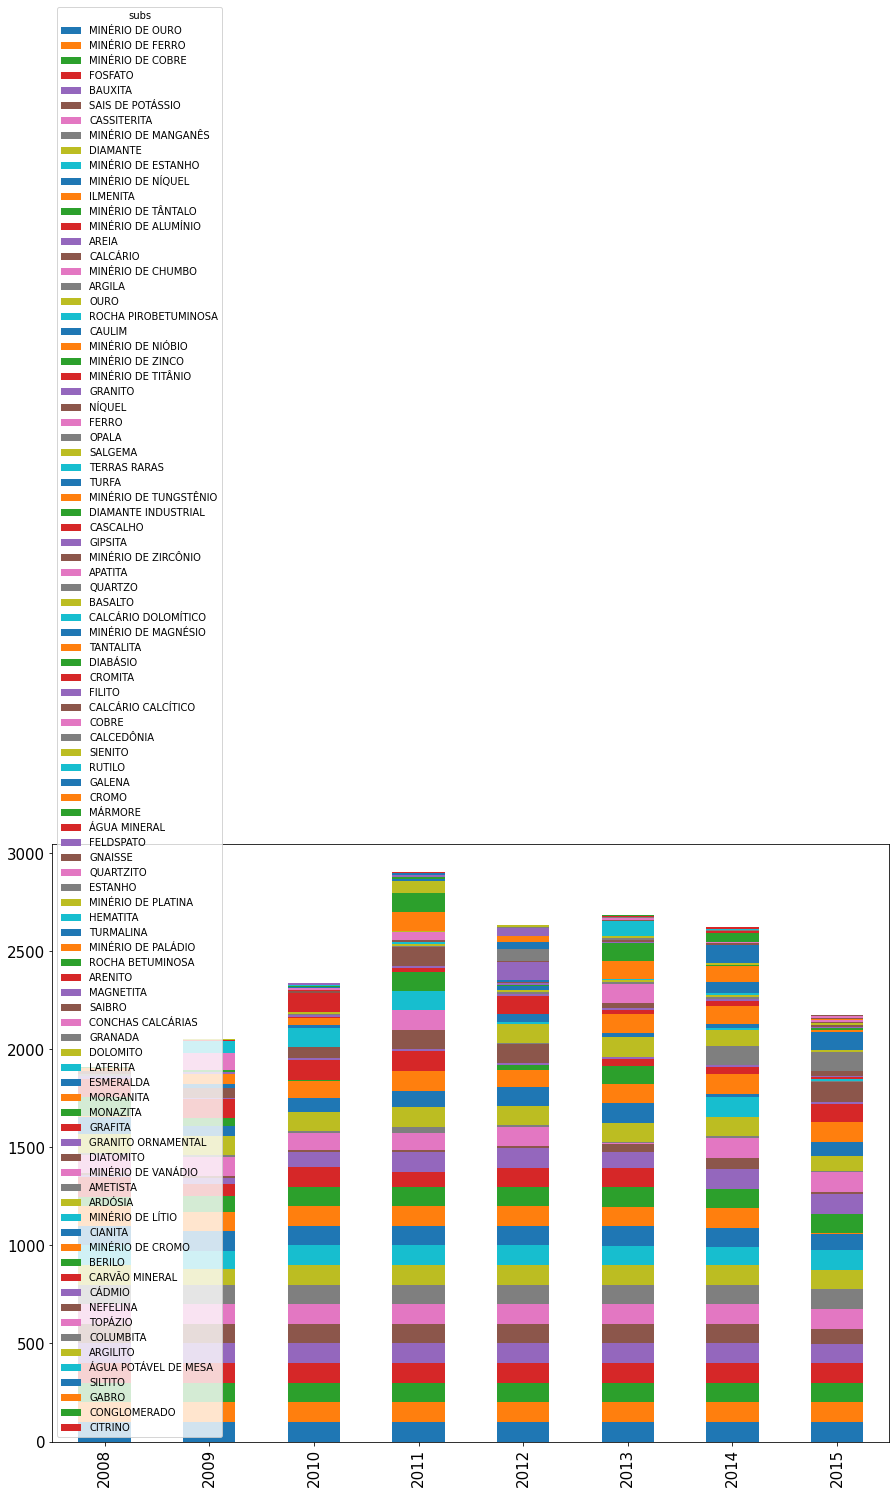

In [32]:
df_max_30=df_max
fig, ax = plt.subplots(figsize=(15,11))
df_max_30.drop('deforest_area_km',axis=1).plot.bar(stacked=True, ax=ax, fontsize=15)
plt.show()